In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
vecs = np.load('/content/drive/MyDrive/ML_Data/train_vecs.npz')['arr_0']

In [ ]:
labels = np.load('/content/drive/MyDrive/ML_Data/train_labels.npy')

In [ ]:
vecs

array([[ 9.76354000e-04,  1.31251235e-02, -8.36467370e-03, ...,
         6.41719624e-02,  8.90527591e-02,  5.73800000e+03],
       [-1.73666775e-02, -2.52663940e-02, -4.50427234e-02, ...,
         6.41719624e-02,  8.90527591e-02,  5.73800000e+03],
       [-1.06208178e-03,  5.52577116e-02,  1.15972897e-02, ...,
         6.41719624e-02,  8.90527591e-02,  5.73800000e+03],
       ...,
       [ 1.60823762e-02,  5.23888282e-02,  1.73320062e-02, ...,
        -3.98391150e-02, -3.44164968e-02,  3.86400000e+03],
       [ 1.90722477e-02,  2.56625265e-02, -6.22367207e-03, ...,
        -3.98391150e-02, -3.44164968e-02,  4.35000000e+03],
       [ 1.45009691e-02,  4.46528122e-02,  6.37244666e-03, ...,
        -3.98391150e-02, -3.44164968e-02,  4.10300000e+03]])

In [ ]:
labels

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vecs,
                                                    labels,
                                                    test_size=0.25,
                                                    stratify=labels,
                                                    shuffle=True,
                                                    random_state=42)

In [ ]:
np.shape(X_train)

(185256, 1025)

In [ ]:
np.shape(y_train)

(185256,)

In [ ]:
X_val = np.load('/content/drive/MyDrive/ML_Data/val_vecs.npz')['arr_0']

In [ ]:
y_val = np.load('/content/drive/MyDrive/ML_Data/val_labels.npy')

Gaussian Naive Bayes Classifier


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     57410
           1       0.37      0.39      0.38      4342

    accuracy                           0.91     61752
   macro avg       0.66      0.67      0.67     61752
weighted avg       0.91      0.91      0.91     61752



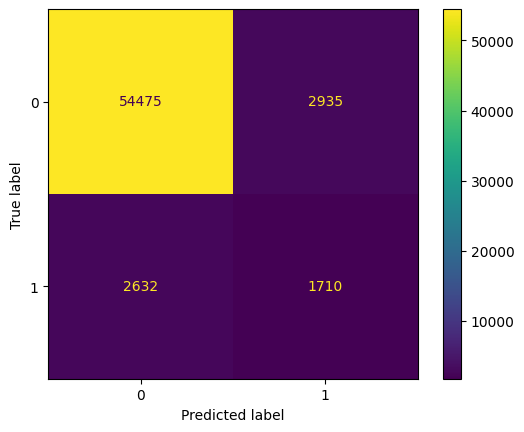

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb_display = ConfusionMatrixDisplay(cm_nb).plot()

In [ ]:
y_pred_val_nb = nb.predict(X_val)

In [ ]:
np.shape(y_pred_val_nb)

(14036,)

In [ ]:
print(classification_report(y_val, y_pred_val_nb))
# Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     13003
           1       0.38      0.44      0.40      1033

    accuracy                           0.91     14036
   macro avg       0.67      0.69      0.68     14036
weighted avg       0.91      0.91      0.91     14036



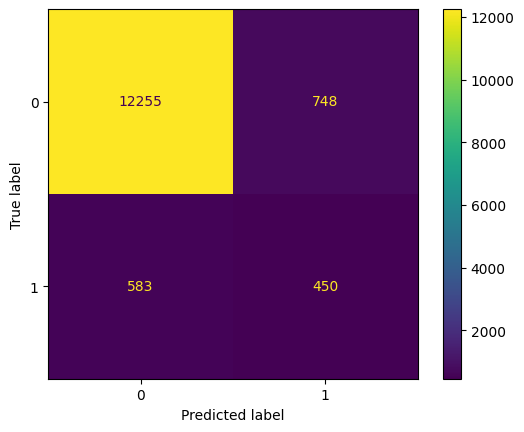

In [ ]:
cm_nb_val = confusion_matrix(y_val, y_pred_val_nb)
cm_nb_val_display = ConfusionMatrixDisplay(cm_nb_val).plot()

In [ ]:
np.save('/content/drive/MyDrive/ML_Data/labels_naive_bayes.npy', y_pred_val_nb)

KNN (n = 5, n = 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     57410
           1       0.59      0.54      0.56      4342

    accuracy                           0.94     61752
   macro avg       0.78      0.75      0.76     61752
weighted avg       0.94      0.94      0.94     61752



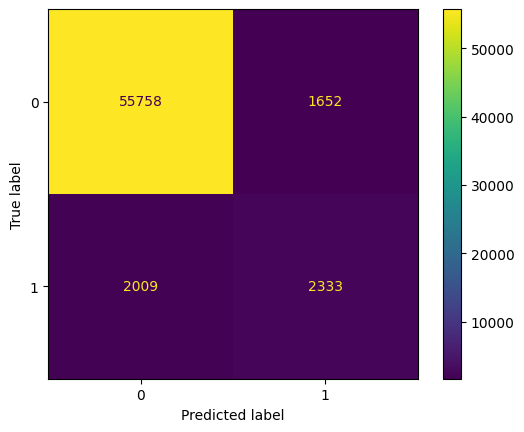

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn_display = ConfusionMatrixDisplay(cm_knn).plot()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     57410
           1       0.59      0.68      0.64      4342

    accuracy                           0.94     61752
   macro avg       0.79      0.82      0.80     61752
weighted avg       0.95      0.94      0.95     61752



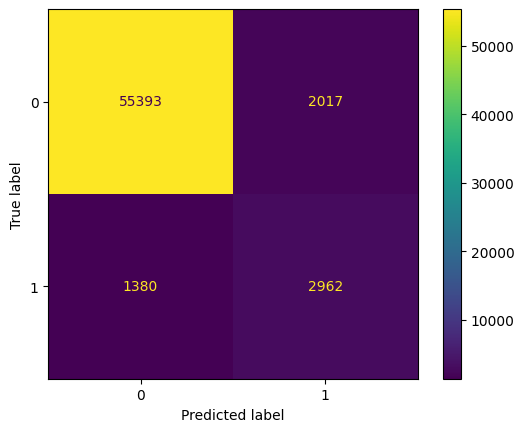

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn_display = ConfusionMatrixDisplay(cm_knn).plot()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=3, weights='distance', algorithm='kd_tree')

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=3, n_neighbors=1,
                     weights='distance')

In [ ]:
y_pred_val_knn = knn.predict(X_val) # пробовала n = 1, 2, 5, 8, всегда 0 для класса 1

In [ ]:
print(classification_report(y_val, y_pred_val_knn))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     13003
           1       0.00      0.00      0.00      1033

    accuracy                           0.92     14036
   macro avg       0.46      0.50      0.48     14036
weighted avg       0.86      0.92      0.89     14036



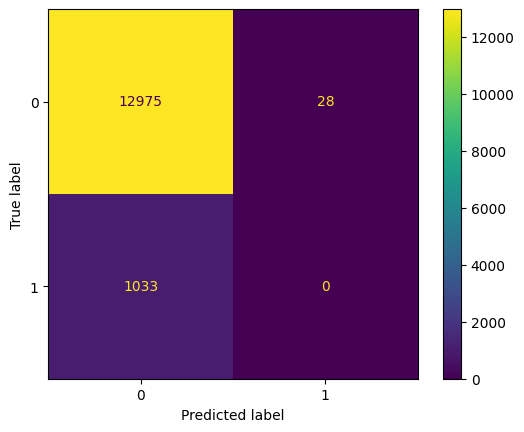

In [ ]:
cm_knn_val = confusion_matrix(y_val, y_pred_val_knn)
cm_knn_val_display = ConfusionMatrixDisplay(cm_knn_val).plot()

In [ ]:
np.save('/content/drive/MyDrive/ML_Data/labels_knn.npy', y_pred_val_knn)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter=5000, random_state=42, class_weight='balanced')

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

In [ ]:
y_pred_logreg = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88     57410
           1       0.23      0.80      0.35      4342

    accuracy                           0.79     61752
   macro avg       0.60      0.79      0.61     61752
weighted avg       0.93      0.79      0.84     61752



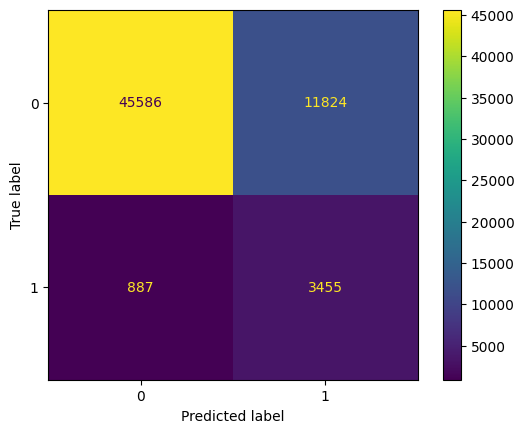

In [ ]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_logreg_display = ConfusionMatrixDisplay(cm_logreg).plot()

In [ ]:
y_pred_val_logreg = logreg.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred_val_logreg))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     13003
           1       0.21      0.84      0.34      1033

    accuracy                           0.75     14036
   macro avg       0.60      0.80      0.59     14036
weighted avg       0.93      0.75      0.81     14036



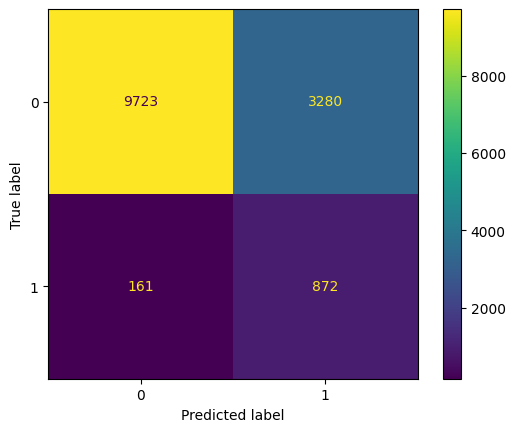

In [ ]:
cm_logreg_val = confusion_matrix(y_val, y_pred_val_logreg)
cm_logreg_val_display = ConfusionMatrixDisplay(cm_logreg_val).plot()

Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svcl = SVC()

In [ ]:
svcl.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svcl = svcl.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svcl))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     57410
           1       0.00      0.00      0.00      4342

    accuracy                           0.93     61752
   macro avg       0.46      0.50      0.48     61752
weighted avg       0.86      0.93      0.90     61752



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


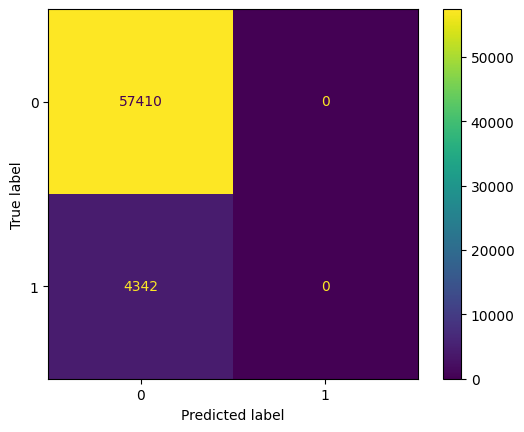

In [ ]:
cm_svcl = confusion_matrix(y_test, y_pred_svcl)
cm_svcl_display = ConfusionMatrixDisplay(cm_svcl).plot()

In [ ]:
y_pred_val_svm = svcl.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred_val_svm))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     13003
           1       0.00      0.00      0.00      1033

    accuracy                           0.93     14036
   macro avg       0.46      0.50      0.48     14036
weighted avg       0.86      0.93      0.89     14036



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


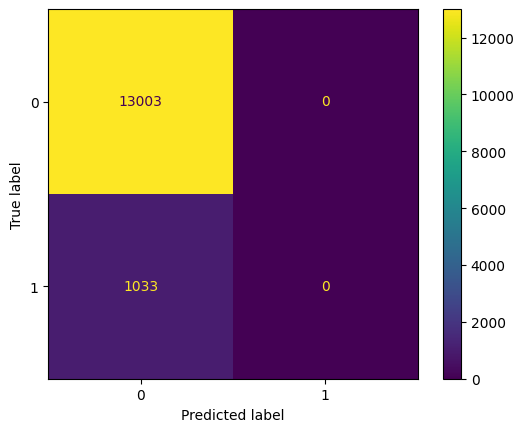

In [ ]:
cm_svm_val = confusion_matrix(y_val, y_pred_val_svm)
cm_svm_val_display = ConfusionMatrixDisplay(cm_svm_val).plot()

In [ ]:
np.save('/content/drive/MyDrive/ML_Data/labels_svm.npy', y_pred_val_svm)

Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
clf = BaggingClassifier(estimator=LogisticRegression(class_weight='balanced', max_iter=5000), n_estimators=10, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression(class_weight='balanced',
                                               max_iter=5000),
                  random_state=42)

In [ ]:
y_pred_clf = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     57410
           1       0.25      0.84      0.38      4342

    accuracy                           0.81     61752
   macro avg       0.62      0.83      0.64     61752
weighted avg       0.93      0.81      0.85     61752



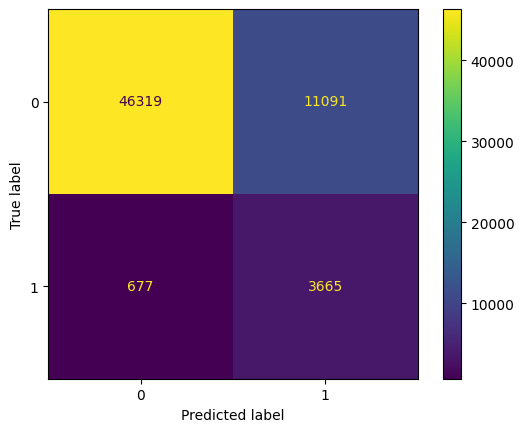

In [ ]:
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf_display = ConfusionMatrixDisplay(cm_clf).plot()

In [ ]:
y_pred_val_clf = clf.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred_val_clf))
# BaggingClassifier(estimator=LogisticRegression)

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     13003
           1       0.23      0.90      0.37      1033

    accuracy                           0.77     14036
   macro avg       0.61      0.83      0.62     14036
weighted avg       0.93      0.77      0.83     14036



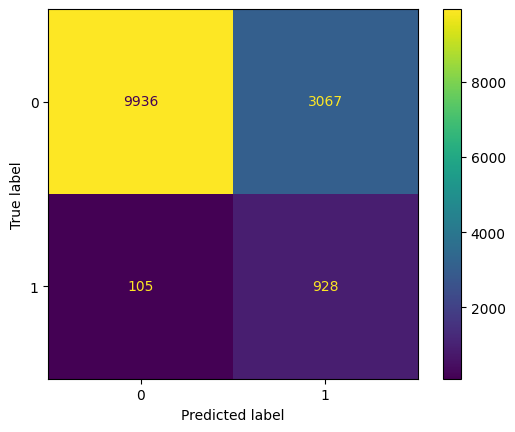

In [ ]:
cm_clf_val = confusion_matrix(y_val, y_pred_val_clf)
cm_clf_val_display = ConfusionMatrixDisplay(cm_clf_val).plot()

In [ ]:
np.save('/content/drive/MyDrive/ML_Data/labels_bagging_logreg.npy', y_pred_val_clf)

Stacking

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [('logreg', LogisticRegression(class_weight='balanced', max_iter=5000))]
final_estimator = GaussianNB()

In [ ]:
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator, n_jobs=4)

In [ ]:
stack.fit(X_train, y_train)

StackingClassifier(estimators=[('logreg',
                                LogisticRegression(class_weight='balanced',
                                                   max_iter=5000))],
                   final_estimator=GaussianNB(), n_jobs=4)

In [ ]:
y_preds_stack = stack.predict(X_test)

In [ ]:
print(classification_report(y_test, y_preds_stack))
# Stacking, final_estimator = GaussianNB()

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     57410
           1       0.43      0.34      0.38      4342

    accuracy                           0.92     61752
   macro avg       0.69      0.65      0.67     61752
weighted avg       0.91      0.92      0.92     61752



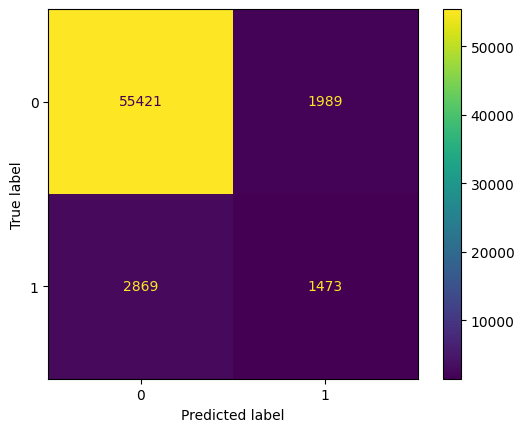

In [ ]:
cm_stack = confusion_matrix(y_test, y_preds_stack)
cm_stack_display = ConfusionMatrixDisplay(cm_stack).plot()

In [ ]:
y_pred_val_stack = stack.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred_val_stack))
# Stacking, final_estimator = GaussianNB()

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     13003
           1       0.42      0.42      0.42      1033

    accuracy                           0.92     14036
   macro avg       0.69      0.69      0.69     14036
weighted avg       0.91      0.92      0.91     14036



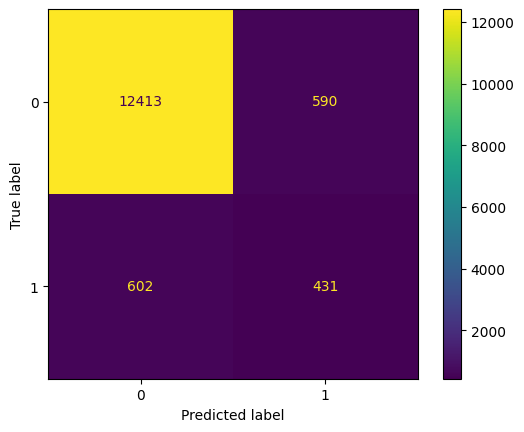

In [ ]:
cm_stack_val = confusion_matrix(y_val, y_pred_val_stack)
cm_stack_val_display = ConfusionMatrixDisplay(cm_stack_val).plot()

In [ ]:
np.save('/content/drive/MyDrive/ML_Data/labels_stacking.npy', y_pred_val_clf)